# Importing necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading Books.csv data into a DataFrame
df_book = pd.read_csv('Books.csv')

# Loading Ratings.csv data into a DataFrame
df_rating = pd.read_csv('Ratings-2.csv')

# Loading Users.csv data into a DataFrame
df_user = pd.read_csv('Users.csv')

In [3]:
# Display the first 5 rows of the Books

df_book.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
# Display the first 5 rows of the rating

df_rating.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [5]:
# Display the first 5 rows of the Users

df_user.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


<span style="color:brown; font-weight:bold; font-size:24px;">Data Exploration</span>

### Check all the columns

In [6]:
df_book.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<span style="color:darkblue; font-weight:bold; font-size:24px;">Data Information:</span>

- ##### ISBN : A unique identifier fot the book
- ##### Book-Title : The title of the book
- ##### Book-Author : The author of the book
- ##### Year-Of-Publication: The year in which the book was published.
- ##### Publisher: The publisher of the book
- ##### Image-URL-S: A URL pointing to a small image of the book cover
- ##### Image-URL-M: A URL pointing to a medium-sized image of the book cover.
- ##### Image-URL-L: A URL pointing to a large image of the book cover.

In [7]:
df_rating.columns

Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<span style="color:darkblue; font-weight:bold; font-size:24px;">Data Information:</span>

- ##### User-ID : A unique identifier for the user who provided the rating
- ##### ISBN : A unique identifier for the book that was rated.
- ##### Book-Rating: The rating given to the book by the user.


In [8]:
df_user.columns

Index(['User-ID', 'Location', 'Age'], dtype='object')

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<span style="color:darkblue; font-weight:bold; font-size:24px;">Data Information:</span>

- ##### User-ID : A unique identifier for the user.
- ##### Location : Location of the user.
- ##### Age : The age of the user.

<span style="color:brown; font-weight:bold; font-size:24px;">Shape of the datasets</span>


In [9]:
print(f"The Books dataset has {df_book.shape[0]} rows and {df_book.shape[1]} features")

The Books dataset has 271360 rows and 8 features


In [10]:
print(f"The Ratings dataset has {df_rating.shape[0]} rows and {df_rating.shape[1]} features")

The Ratings dataset has 1149780 rows and 3 features


In [11]:
print(f"The Users dataset has {df_user.shape[0]} rows and {df_user.shape[1]} features")

The Users dataset has 278858 rows and 3 features


<span style="color:brown; font-weight:bold; font-size:24px;">Rename the columns for better understanding</span>

In [12]:
df_book.rename(columns = {'Book-Title' : 'Book_Title',
                          'Book-Author' :'Author',
                          'Year-Of-Publication' : 'Publication_Year',
                          'Publisher' : 'Publisher',
                          'Image-URL-S': 'Image_URL_Small',
                          'Image-URL-M' : 'Image_URL_Medium',
                          'Image-URL-L' : 'Image_URL_Large'}, inplace = True)

df_book.head()

,ISBN,Book_Title,Author,Publication_Year,Publisher,Image_URL_Small,Image_URL_Medium,Image_URL_Large
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [13]:
df_rating.rename(columns={'User-ID' : 'User_ID',
                          'Book-Rating': 'Book_Rating'}, inplace = True)

df_rating.head()

,User_ID,ISBN,Book_Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [14]:
df_user.rename(columns ={'User-ID' : 'User_ID'}, inplace = True)

df_user.head()
                         

,User_ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


<span style="color:brown; font-weight:bold; font-size:24px;">
Check for Missing Values</span>

In [15]:
df_book.isnull().sum()

ISBN                0
Book_Title          0
Author              2
Publication_Year    0
Publisher           2
Image_URL_Small     0
Image_URL_Medium    0
Image_URL_Large     3
dtype: int64

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<span style="color:darkblue; font-weight:bold; font-size:24px;">Insights:</span>

- ##### It contains few missing values, with 2 missing entries in Author and Publisher columns, and 3 missing entries in Image_URL_Large column, but no missing entries in other columns

In [16]:
df_rating.isnull().sum()

User_ID        0
ISBN           0
Book_Rating    0
dtype: int64

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<span style="color:darkblue; font-weight:bold; font-size:24px;">Insights:</span>

- ##### No Missing values are present


In [17]:
df_user.isnull().sum()

User_ID          0
Location         0
Age         110762
dtype: int64

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<span style="color:darkblue; font-weight:bold; font-size:24px;">Insights:</span>

- ##### There are 110762 missing values in the Age column, while User_ID and Location have no missing entries

<span style="color:brown; font-weight:bold; font-size:24px;">
Check for Duplicate records</span>

In [18]:
print("Duplicates in Book dataset:", df_book.duplicated().sum())
print("Duplicates in Rating dataset:",df_rating.duplicated().sum())
print("Duplicates in User dataset:",df_user.duplicated().sum())

Duplicates in Book dataset: 0
Duplicates in Rating dataset: 0
Duplicates in User dataset: 0


<span style="color:brown; font-weight:bold; font-size:24px;">
Merge df_book and df_rating</span>

In [19]:
df_book_rating = df_book.merge(df_rating, on = 'ISBN')
df_book_rating.columns

Index(['ISBN', 'Book_Title', 'Author', 'Publication_Year', 'Publisher',
       'Image_URL_Small', 'Image_URL_Medium', 'Image_URL_Large', 'User_ID',
       'Book_Rating'],
      dtype='object')

<span style="color:brown; font-weight:bold; font-size:24px;">
Collaborative Filtering Based Recommender System</span>

In [20]:
# Select ratings from users who rated for more than 200 books
# From these ratings, select the books that have been rated by more than 50 avtive users
# Create a DataFrame with ratings only for the famous books and only from active users

In [21]:
# Lets store users who had at least rated more than 200 books

x= df_book_rating['User_ID'].value_counts()> 200
x.shape

(92106,)

In [22]:
# y stores the index of users who have rated more than 200 books

y = x[x].index

In [23]:
# Filter the original dataframe to include only ratings from users in y

filtered_rating = df_book_rating[df_book_rating['User_ID'].isin(y)]

In [24]:
# Group the filtered rating by Book Title and count the ratings per book. 
# Then, Store books with at least 50 ratings in famous books

y = filtered_rating.groupby('Book_Title').count()['Book_Rating']>=50
famous_books = y[y].index

In [25]:
# Filter the filtered_rating dataframe to include only books in famous_books

final_ratings = filtered_rating[filtered_rating['Book_Title'].isin(famous_books)]
final_ratings.shape

(58586, 10)

In [26]:
final_ratings.head()

,ISBN,Book_Title,Author,Publication_Year,Publisher,Image_URL_Small,Image_URL_Medium,Image_URL_Large,User_ID,Book_Rating
31,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,11676,9
33,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,36836,0
34,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,46398,9
38,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,113270,0
39,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,113519,0


In [27]:
df_book_rating.head()

,ISBN,Book_Title,Author,Publication_Year,Publisher,Image_URL_Small,Image_URL_Medium,Image_URL_Large,User_ID,Book_Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385,0


In [28]:
df_book_rating.shape

(1031136, 10)

<span style="color:brown; font-weight:bold; font-size:24px;">
Top 10 Publishers with the Most Books</span>

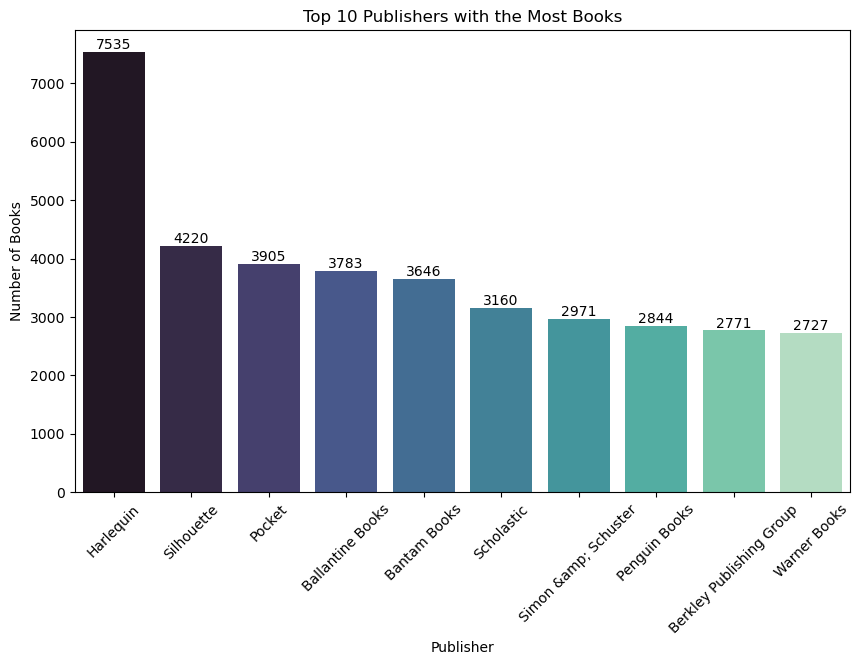

In [29]:
top_publishers = df_book['Publisher'].value_counts().head(10)

# Create a bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x= top_publishers.index, y=top_publishers.values,palette='mako')

for container in ax.containers:
    ax.bar_label(container)
    
plt.title('Top 10 Publishers with the Most Books')
plt.xlabel('Publisher')
plt.ylabel('Number of Books')
plt.xticks(rotation=45)
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<span style="color:darkblue; font-weight:bold; font-size:24px;">Insights:</span>

- ##### Harlequin dominates the top 10 publishers with over 7000 books, far exceeding others like Silhouette and Pocket which each have around 3000 to 4000 books.
- ##### The remaning publishers have a more evenly distributed book count, indicating harlequin's strong lead in the market

<span style="color:brown; font-weight:bold; font-size:24px;">
Top 10 Authors with the Most Books</span>

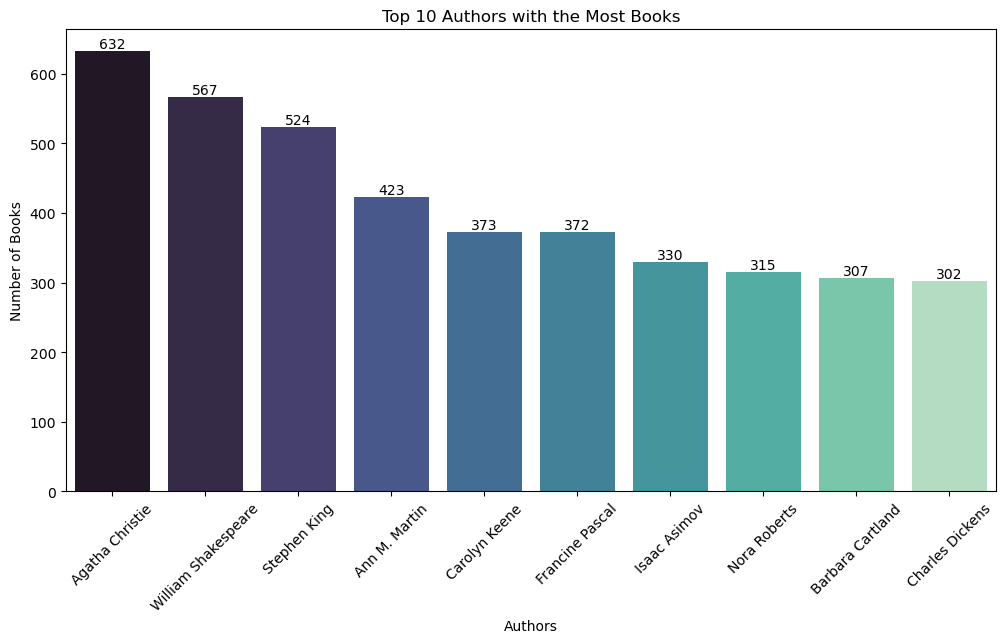

In [30]:
top_authors = df_book['Author'].value_counts().head(10)

# Create a bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(x= top_authors.index, y=top_authors.values,palette='mako')

for container in ax.containers:
    ax.bar_label(container)
    
plt.title('Top 10 Authors with the Most Books')
plt.xlabel('Authors')
plt.ylabel('Number of Books')
plt.xticks(rotation=45)
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<span style="color:darkblue; font-weight:bold; font-size:24px;">Insights:</span>

- ##### Agatha Christie is the most prolific author with over 600 books, followed by William Shakespeare and Stephen King, who each have around 500 books. The other top 10 authos have between 400 to 500 books, showing Christie's clear lead.

<span style="color:brown; font-weight:bold; font-size:24px;">
Number of Books Published by Year</span>

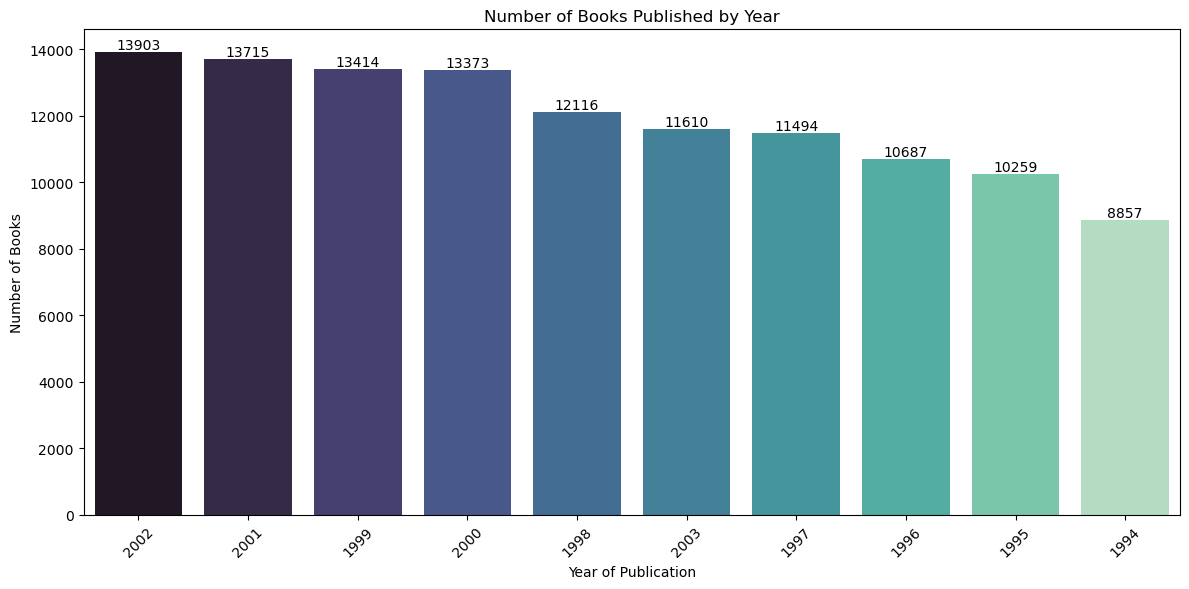

In [35]:
# Group the data by the 'Year-of-publication' and count the number of books in each year.
year_counts = df_book.groupby('Publication_Year').size().sort_values(ascending = False)

# Top 10 years with the most books published
top_10_years = year_counts.head(10)

# convert years to integers
top_10_years.index = top_10_years.index.astype(int)

# create a bar chart
plt.figure(figsize=(12,6))
ax = sns.barplot(x= top_10_years.index, y =top_10_years.values, order=top_10_years.index,palette='mako')

for container in ax.containers:
    ax.bar_label(container)

plt.title('Number of Books Published by Year')
plt.xlabel('Year of Publication')
plt.ylabel('Number of Books')

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<span style="color:darkblue; font-weight:bold; font-size:24px;">Insights:</span>

- ##### The bar chart shows that the year 2002 had the highest number of books published, followed closely by 2001 and 1999. The number of published books slightly decreases with subsequent years with 1994 having the lowest count among the top 10 years. This trend indicates a peak in book publishing around the early 2000s.

<span style="color:brown; font-weight:bold; font-size:24px;">
Top 10 popular Books</span>

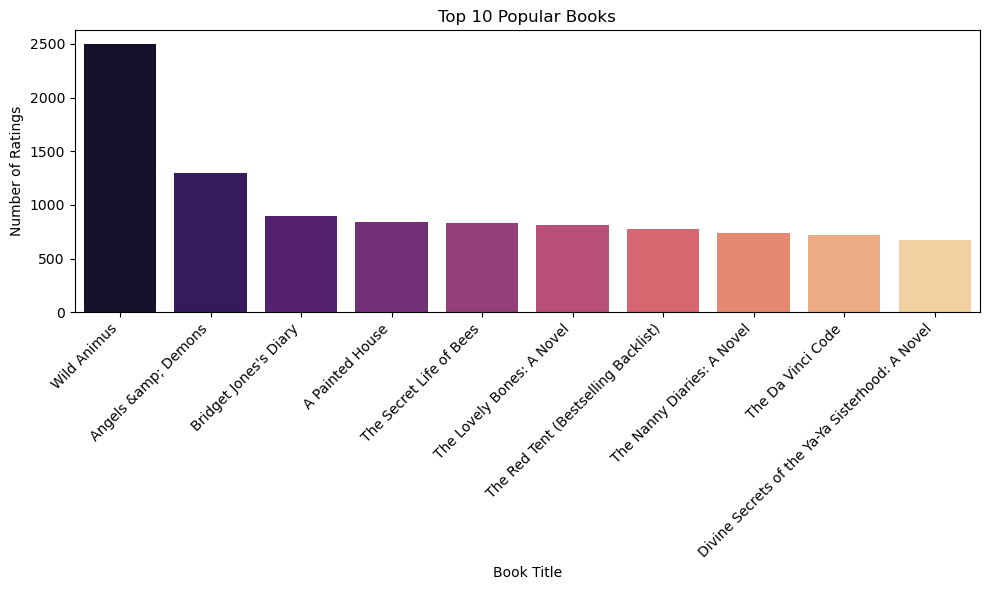

In [42]:
# Calculate the count of ratings for each book
book_ratings_count = df_book_rating.groupby('Book_Title').size().sort_values(ascending=False).head(10)

# Get the top 10 popular books based on ratings count
top_10_popular_books = df_book_rating[df_book_rating['Book_Title'].isin(book_ratings_count.index)]

# Create a bar chart to visualize the top 10 popular books
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_popular_books['Book_Title'].unique(), y=book_ratings_count, palette='magma')
plt.title('Top 10 Popular Books')
plt.xlabel('Book Title')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<span style="color:darkblue; font-weight:bold; font-size:24px;">Insights:</span>

- ##### The bar chart shows the top 10 most popular books based on the number of ratings. Wild Animus is by far the most popular, with over 2500 ratings significantly surpassing the other books. Angels & Demons follows with round 1000 ratings, while the remaning books, such as Bridget Jones's Diary and The Da Vinci Code have between 600 and 800 ratings. This indicaes that Wild Animus has a much broader readership engagement compared to other top titles

<span style="color:brown; font-weight:bold; font-size:24px;">
Distribution of Ratings</span>

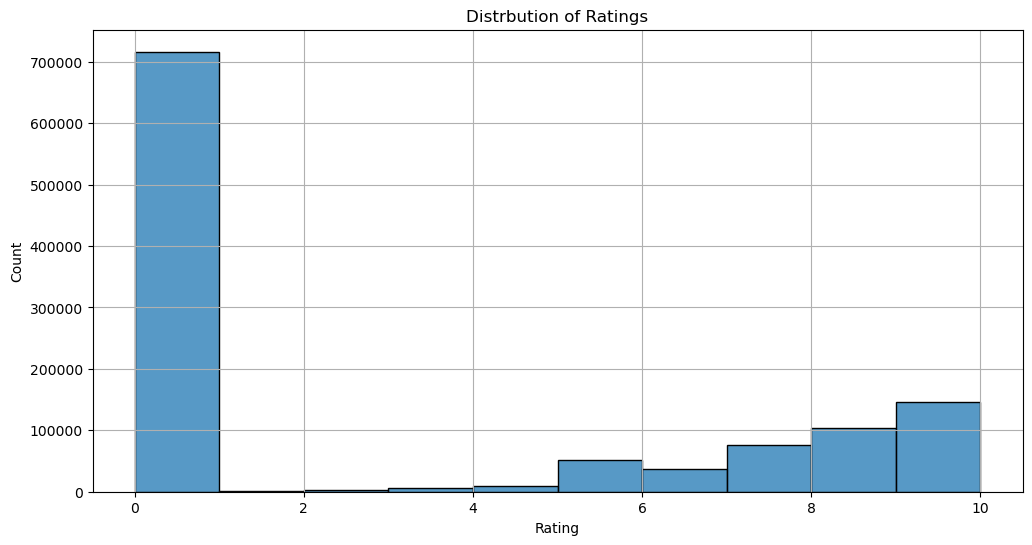

In [44]:
plt.figure(figsize=(12,6))
sns.histplot(df_rating['Book_Rating'], bins=10, kde=False, palette='magma')
plt.title("Distrbution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.grid(True)
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<span style="color:darkblue; font-weight:bold; font-size:24px;">Insights:</span>

- ##### The histogram shows that the majority of book ratings are at the extremes, with large concentration at 0 and significant number at 10, indicating polarized user opinions. Most other ratings are much lesser frequent.

<span style="color:brown; font-weight:bold; font-size:24px;">
Top 10 Most active Users</span>

In [50]:
most_active_users

User_ID
11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
212898     4785
278418     4533
76352      3367
110973     3100
235105     3067
Name: count, dtype: int64

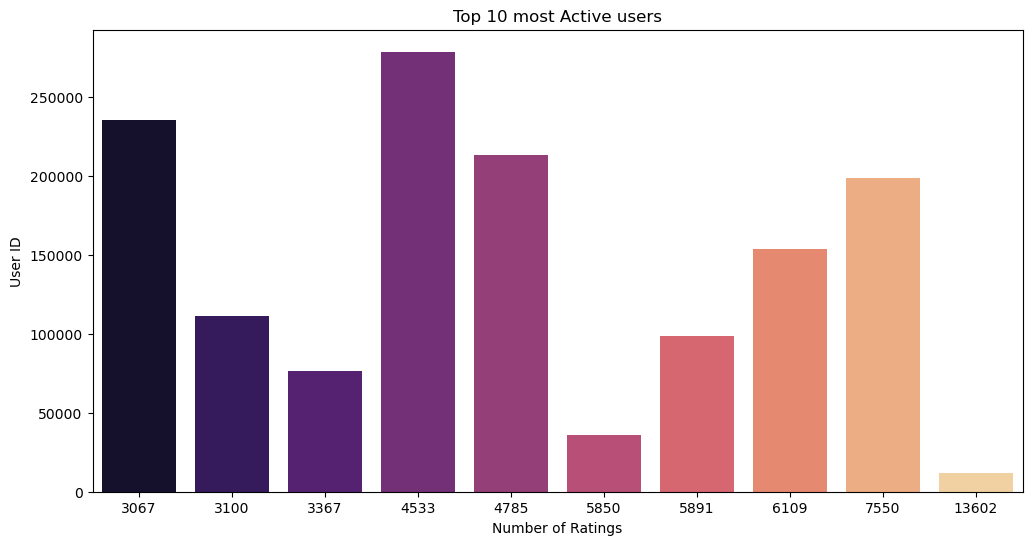

In [49]:
most_active_users = df_rating['User_ID'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x= most_active_users.values, y=most_active_users.index, palette='magma')

plt.title("Top 10 most Active users")
plt.xlabel("Number of Ratings")
plt.ylabel("User ID")
plt.show()



<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<span style="color:darkblue; font-weight:bold; font-size:24px;">Insights:</span>

- ##### The bar chart shows the one user is overwhelmingly the most active , with over 13000 ratings, while the other top 10 users have significantly fewer ratings, ranging from 3000 to 7000 ratings. This indicates a highly skewed distribution of activity among the most active users

<span style="color:brown; font-weight:bold; font-size:24px;">
Top 10 User locations</span>

In [54]:
# Extract the country from the 'Location' column, assuming it's the last part after a comma
df_user['Country'] = df_user['Location'].apply(lambda x: x.split(',')[-1].strip().lower() if pd.notnull(x) else 'unknown')

# Display the first few entries of the 'country' column to verify the extraction
df_user['Country'].head()

# Count the occurences of each country in the 'country' column
country_counts = df_user['Country'].value_counts()

<Axes: xlabel='Country'>

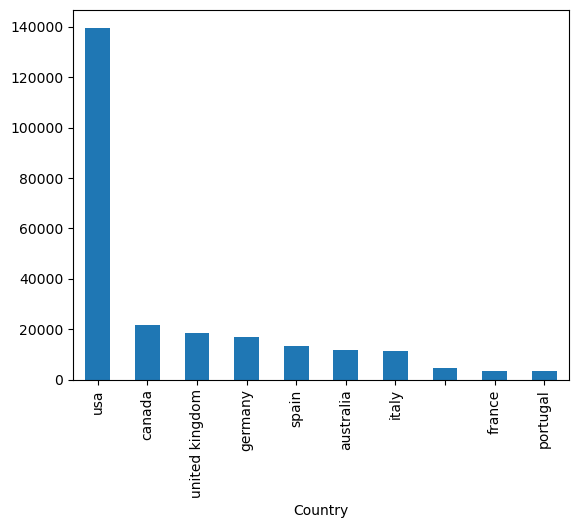

In [56]:
df_user['Country'].value_counts().head(10).plot(kind='bar')

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<span style="color:darkblue; font-weight:bold; font-size:24px;">Insights:</span>

- ##### The bar chart shows that the user base is owewhelmingly dominated by the USA with more 140000 users. Canada, the United Kingdom and Germany follow, but with significantly samller user bases. This indicates that the majority of the users are concentrated in the USA, with other countries contributing a much smaller portion of the overall user population.

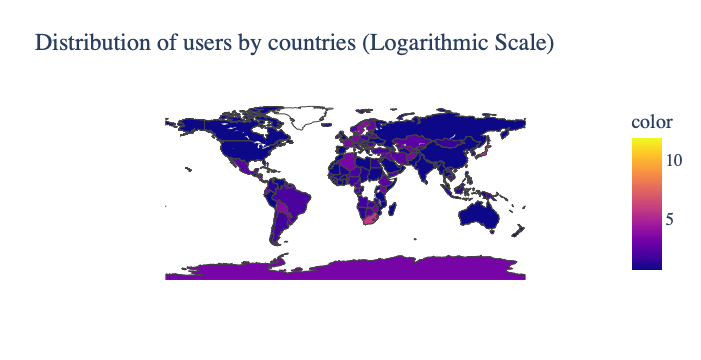

In [58]:
# Logarithmic scale transformation for better visualization
country_counts_log = np.log1p(country_counts)  # log(1 + x) to handle zeros

# Create the choropleth map
fig = px.choropleth(
    locations=country_counts.index,
    locationmode='country names',  # Match the country names in your data
    color=country_counts_log,  # Use the logarithmic scale
    color_continuous_scale='Plasma',
    range_color=(country_counts_log.min(), country_counts_log.max()),  # Adjust range for log scale
    template='plotly_white',
    title='Distribution of users by countries (Logarithmic Scale)'
)

# Customize the layout
fig.update_layout(
    font=dict(size=17, family="Franklin Gothic"),
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='equirectangular'
    )
)

# Show the plot
fig.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<span style="color:darkblue; font-weight:bold; font-size:24px;">Insights:</span>

- ##### The choropleth map shows a global distribution of users, with higher concentration of users in North America, Europe and parts of Asia, as indicated by the logarithemic color scale. This suggests that the user base is predominantly located in these regions.

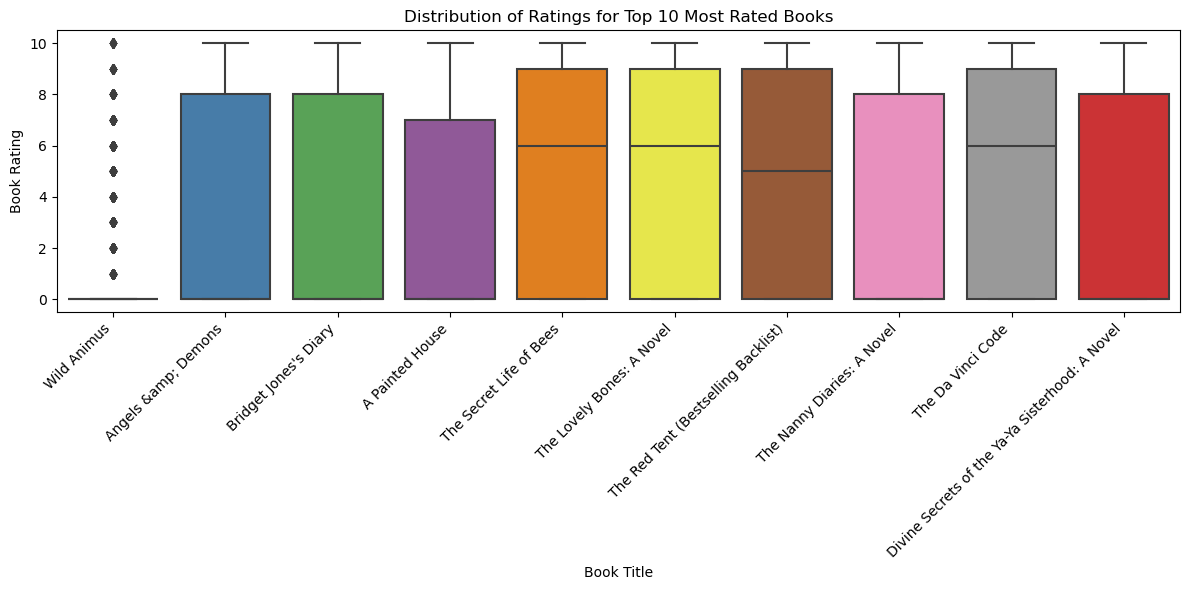

In [70]:
top_10_books = df_book_rating.groupby('Book_Title').size().sort_values(ascending=False).head(10)

# Step 2: Filter the dataframe to include only the top 10 books
top_10_books_data = df_book_rating[df_book_rating['Book_Title'].isin(top_10_books.index)]

# Step 3: Calculate the average rating for these top 10 books
avg_ratings_top_10 = top_10_books_data.groupby('Book_Title')

plt.figure(figsize=(12,6))
sns.boxplot(x = 'Book_Title', y='Book_Rating', data = top_10_books_data, palette='Set1')
plt.title('Distribution of Ratings for Top 10 Most Rated Books')
plt.xlabel('Book Title')
plt.ylabel('Book Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<span style="color:darkblue; font-weight:bold; font-size:24px;">Insights:</span>

- ##### This box plot shows that the ratings for the top 10 most rated books vary widely, with most books having a median around 6 to 9. Wild Animus has a wider distribution of rating including many low ratings, while other books like Angels & Demons and Bridget jones Diary have more concentrated and higher ratings. This suggests that while these popular books generally receive good ratings, some like Wild Animus are more polarized among readers

In [76]:
# Piot the DataFrame to create a user-item matrix
# Rows are 'Book_Title', columns are 'User_ID', and the values are 'Book_Rating'

user_item_matrix = final_ratings.pivot_table(columns ='User_ID', index = 'Book_Title', values = 'Book_Rating')

user_item_matrix

User_ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book_Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Bend in the Road,0.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,9.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [77]:
# Handling missing values (fill with 0)
user_item_matrix_filled = user_item_matrix.fillna(0)

user_item_matrix_filled

User_ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book_Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<span style="color:brown; font-weight:bold; font-size:24px;">
Model Training</span>

In [78]:
# Convert the filled user-item matrix to a sparse matrix format
# This is efficient for storage and computation, especially with large matrices that contain many zeroes
book_sparse = csr_matrix(user_item_matrix_filled)

In [79]:
# Initialize the Nearest Neighbors model using the 'brute' algorithm and 'cosine' similarity as the metric
# This unsupervised machine learning algorithm finds the nearest neighbors based on the cosine similarity

model = NearestNeighbors(algorithm= 'brute', metric='cosine')
model.fit(book_sparse)

NearestNeighbors(algorithm='brute', metric='cosine')

In [80]:
# Finding similar books using Nearest Neighbors
distance, suggestion = model.kneighbors(user_item_matrix_filled.iloc[237,:].values.reshape(1,-1), n_neighbors=6)

print("Distances:", distance)
print("Suggestions (Indices):", suggestion)



Distances: [[0.         0.67948966 0.70002088 0.71630418 0.71828125 0.72770943]]
Suggestions (Indices): [[237 145 303 137  95  58]]


In [81]:
# Show the titles corresponding to the suggestions

print("Suggested Books for User at Index 241:")
print(user_item_matrix_filled.index[suggestion[0]])

Suggested Books for User at Index 241:
Index(['Hearts In Atlantis', 'Desperation', 'Lightning',
       'Dark Rivers of the Heart', 'Carrie', 'Bag of Bones'],
      dtype='object', name='Book_Title')


In [82]:
# Keeping a List of Book Titles
book_names = user_item_matrix_filled.index

In [84]:
# Find the index of a specific book

book_idx = np.where(user_item_matrix_filled.index == '4 Blondes')[0][0]
print(f"Index of '4 Blondes' : {book_idx}")

Index of '4 Blondes' : 3


In [85]:
# Find the URL of a specific book
# Assume final_ratings dataframe has a 'Book_Title' and 'Image_URL_Large' columns

book_title = 'Harry Potter and the Chamber of Secrets (Book 2)'

ids = np.where(final_ratings['Book_Title'] == book_title)[0][0]
image_url = final_ratings.iloc[ids]['Image_URL_Large']
print(f"Image URL for '{book_title}': {image_url}")

Image URL for 'Harry Potter and the Chamber of Secrets (Book 2)': http://images.amazon.com/images/P/0439064872.01.LZZZZZZZ.jpg


In [87]:
# Get URLs of Suggested books

book_name_list = []
for book_id in suggestion[0]:
    book_name_list.append(user_item_matrix_filled.index[book_id])

In [88]:
# Finding the image URLs of these book titles

ids_index = []
for name in book_name_list:
    ids = np.where(final_ratings['Book_Title'] == name)[0][0]
    ids_index.append(ids)

In [89]:
for idx in ids_index:
    url = final_ratings.iloc[idx]['Image_URL_Large']
    print(f"Image URL for '{final_ratings.iloc[idx]['Book_Title']}': {url}")

Image URL for 'Hearts In Atlantis': http://images.amazon.com/images/P/0671024248.01.LZZZZZZZ.jpg
Image URL for 'Desperation': http://images.amazon.com/images/P/0451188462.01.LZZZZZZZ.jpg
Image URL for 'Lightning': http://images.amazon.com/images/P/0425115801.01.LZZZZZZZ.jpg
Image URL for 'Dark Rivers of the Heart': http://images.amazon.com/images/P/034539657X.01.LZZZZZZZ.jpg
Image URL for 'Carrie': http://images.amazon.com/images/P/0451157443.01.LZZZZZZZ.jpg
Image URL for 'Bag of Bones': http://images.amazon.com/images/P/067102423X.01.LZZZZZZZ.jpg


In [91]:
# Defining a Function to recommend Books

def recommend_book(book_name):
    book_id = np.where(user_item_matrix_filled.index == book_name)[0][0]
    distance, suggestion = model.kneighbors(user_item_matrix_filled.iloc[book_id, :].values.reshape(1,-1), n_neighbors=6)
    print(f"You searched for '{book_name}'\n")
    print("The suggested books are:\n")
    for i in range(len(suggestion)):
        books = user_item_matrix_filled.index[suggestion[i]]
        for j in books:
            if j != book_name:
                print(j)

# Example: Recommend books similar to "Harry Potter and the Chamber of Secrets (Book 2)"

book_name = "Harry Potter and the Chamber of Secrets (Book 2)"
recommend_book(book_name)


You searched for 'Harry Potter and the Chamber of Secrets (Book 2)'

The suggested books are:

Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
Harry Potter and the Sorcerer's Stone (Book 1)
Harry Potter and the Order of the Phoenix (Book 5)


<span style="color:brown; font-weight:bold; font-size:24px;">
Saving Model and Data Artifacts</span>



In [93]:
import os
import pickle

# Ensure the 'artifacts' directory exists
os.makedirs('artifacts', exist_ok=True)

# Save the model and other objects
pickle.dump(model, open('artifacts/model.pkl', 'wb'))
pickle.dump(book_names, open('artifacts/book_names.pkl', 'wb'))
pickle.dump(final_ratings, open('artifacts/final_rating.pkl', 'wb'))
pickle.dump(user_item_matrix_filled, open('artifacts/book_pivot.pkl', 'wb'))